#Dataset Description:


##Brazilian E-Commerce Public Dataset by Olist
Welcome! This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.




# Context
This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners.

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.



# IMPORT

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta

# Loading the Dataset

In [2]:
# # Step 1: Install gdown
# !pip install gdown

# # Step 2 and 3: Download the file using gdown
# import gdown

# file_id = '14M_l7a3zkk4jkaVFS9SOIs9-tO4u2khV'
# url = f'https://drive.google.com/uc?id={file_id}'
# output = 'downloaded_file.csv'  # Name your file appropriately

# gdown.download(url, output, quiet=False)

# # Load the downloaded CSV file into a DataFrame named df

# OR 

df = pd.read_csv('downloaded_file.csv')

#Exploratory Data Analysis (EDA)

In [3]:
df.head(20)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,Unnamed: 44
0,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,18/11/2017 19:28,18/11/2017 19:45,22/11/2017 13:39,02/12/2017 0:28,15/12/2017 0:00,1,credit_card,...,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,59296,-5.767733,-35.275467,sao goncalo do amarante,RN,NaN
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,18/11/2017 19:28,18/11/2017 19:45,22/11/2017 13:39,02/12/2017 0:28,15/12/2017 0:00,1,credit_card,...,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,59296,-5.771622,-35.271325,sao goncalo do amarante,RN,NaN
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,18/11/2017 19:28,18/11/2017 19:45,22/11/2017 13:39,02/12/2017 0:28,15/12/2017 0:00,1,credit_card,...,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,59296,-5.777424,-35.269238,sao goncalo do amarante,RN,NaN
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,18/11/2017 19:28,18/11/2017 19:45,22/11/2017 13:39,02/12/2017 0:28,15/12/2017 0:00,1,credit_card,...,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,59296,-5.771259,-35.271049,sao goncalo do amarante,RN,NaN
4,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,18/11/2017 19:28,18/11/2017 19:45,22/11/2017 13:39,02/12/2017 0:28,15/12/2017 0:00,1,credit_card,...,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,59296,-5.773971,-35.277776,sao goncalo do amarante,RN,NaN
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,18/11/2017 19:28,18/11/2017 19:45,22/11/2017 13:39,02/12/2017 0:28,15/12/2017 0:00,1,credit_card,...,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,59296,-5.776335,-35.255697,são gonçalo do amarante,RN,NaN
6,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,18/11/2017 19:28,18/11/2017 19:45,22/11/2017 13:39,02/12/2017 0:28,15/12/2017 0:00,1,credit_card,...,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,59296,-5.771012,-35.274882,são gonçalo do amarante,RN,NaN
7,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,18/11/2017 19:28,18/11/2017 19:45,22/11/2017 13:39,02/12/2017 0:28,15/12/2017 0:00,1,credit_card,...,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,59296,-5.777398,-35.273994,sao goncalo do amarante,RN,NaN
8,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,18/11/2017 19:28,18/11/2017 19:45,22/11/2017 13:39,02/12/2017 0:28,15/12/2017 0:00,1,credit_card,...,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,59296,-5.768522,-35.281450,sao goncalo do amarante,RN,NaN
9,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,18/11/2017 19:28,18/11/2017 19:45,22/11/2017 13:39,02/12/2017 0:28,15/12/2017 0:00,1,credit_card,...,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,59296,-5.777398,-35.273994,sao goncalo do amarante,RN,NaN


#Statistical Analysis

In [4]:
df.describe()

############## add some comments are review stats of important columns

,payment_sequential,payment_installments,payment_value,review_score,order_item_id,price,freight_value,seller_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,Unnamed: 44
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,0.0
mean,1.098177e+00,3.000829e+00,1.746336e+02,4.114320e+00,1.129224e+00,1.428477e+02,1.963555e+01,2.600817e+04,4.759826e+01,8.602746e+02,2.431047e+00,2.242896e+03,3.166974e+01,1.882164e+01,2.315515e+01,3.385242e+04,3.385242e+04,-2.194504e+01,-4.604611e+01,NaN
std,5.476746e-01,2.823819e+00,2.295892e+02,1.332940e+00,5.068289e-01,2.045605e+02,1.372865e+01,2.961193e+04,1.014165e+01,5.844768e+02,1.990831e+00,3.946320e+03,1.605427e+01,1.285408e+01,1.154625e+01,2.755694e+04,2.755694e+04,4.394163e+00,3.598363e+00,NaN
min,1.000000e+00,1.000000e+00,1.400000e-01,1.000000e+00,1.000000e+00,2.900000e+00,3.000000e-02,1.021000e+03,1.100000e+01,3.600000e+01,1.000000e+00,5.000000e+01,8.000000e+00,2.000000e+00,8.000000e+00,1.011000e+03,1.011000e+03,-3.660537e+01,-6.788472e+01,NaN
25%,1.000000e+00,1.000000e+00,6.678000e+01,4.000000e+00,1.000000e+00,4.590000e+01,1.398000e+01,4.102000e+03,4.000000e+01,4.640000e+02,1.000000e+00,3.000000e+02,1.900000e+01,1.000000e+01,1.500000e+01,1.317700e+04,1.317700e+04,-2.361366e+01,-4.782036e+01,NaN
50%,1.000000e+00,2.000000e+00,1.181900e+02,5.000000e+00,1.000000e+00,9.500000e+01,1.660000e+01,1.341900e+04,5.100000e+01,7.510000e+02,2.000000e+00,8.500000e+02,2.700000e+01,1.600000e+01,1.900000e+01,2.423000e+04,2.423000e+04,-2.291069e+01,-4.651340e+01,NaN
75%,1.000000e+00,4.000000e+00,2.027700e+02,5.000000e+00,1.000000e+00,1.648900e+02,2.008000e+01,3.601000e+04,5.500000e+01,1.024000e+03,3.000000e+00,2.050000e+03,4.200000e+01,2.500000e+01,3.000000e+01,3.875500e+04,3.875500e+04,-2.035886e+01,-4.341788e+01,NaN
max,1.100000e+01,2.400000e+01,4.809440e+03,5.000000e+00,7.000000e+00,4.099990e+03,1.969400e+02,9.970000e+04,6.400000e+01,3.992000e+03,1.800000e+01,3.000000e+04,1.050000e+02,9.800000e+01,1.050000e+02,9.995000e+04,9.995000e+04,3.832394e+01,-6.775035e+00,NaN


In [95]:
# Step 2: Preprocess the Data
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_year'] = df['order_purchase_timestamp'].dt.year
df['order_month'] = df['order_purchase_timestamp'].dt.month
df['order_month_year'] = df['order_purchase_timestamp'].dt.to_period('M')

# Step 3: Aggregate Data
monthly_data = df.groupby(['order_month_year']).agg(
    total_orders=('order_id', 'count'),
    total_sales=('price', 'sum'),
    unique_sales=('order_id', 'nunique'),
    unique_customers=('customer_id', 'nunique')
).reset_index()

monthly_data = monthly_data.sort_values(by=['order_month_year'])

def generate_monthly_report(monthly_data):
    for index, row in monthly_data.iterrows():
        print(f"Monthly Sales Report for {row['order_year']}-{row['order_month']:}:")
        print(f" - Total Orders: {row['total_orders']}")
        print(f" - Total Sales: {row['total_sales']:.2f}")
        print(f" - Unique Sales: {row['unique_sales']}")
        print(f" - Unique Customers: {row['unique_customers']}")
        print()

monthly_data

,order_month_year,total_orders,total_sales,unique_sales,unique_customers
0,2016-10,4741,899534.63,28,28
1,2017-01,10329,1598620.15,62,62
2,2017-02,22567,2966155.63,131,131
3,2017-03,34779,6067794.30,201,201
4,2017-04,29921,4753330.12,174,174
5,2017-05,56353,7238352.39,309,309
6,2017-06,47764,8276829.37,272,272
7,2017-07,52586,6854195.66,306,306
8,2017-08,71714,9892397.20,382,382
9,2017-09,48243,7178632.77,285,285


#Data Visualization
##Monthly Sales Report:
###- Total Orders: [X]
###- Total Sales: [X]
###- Unique Sales: [X]
###- Unique Customers: [X]

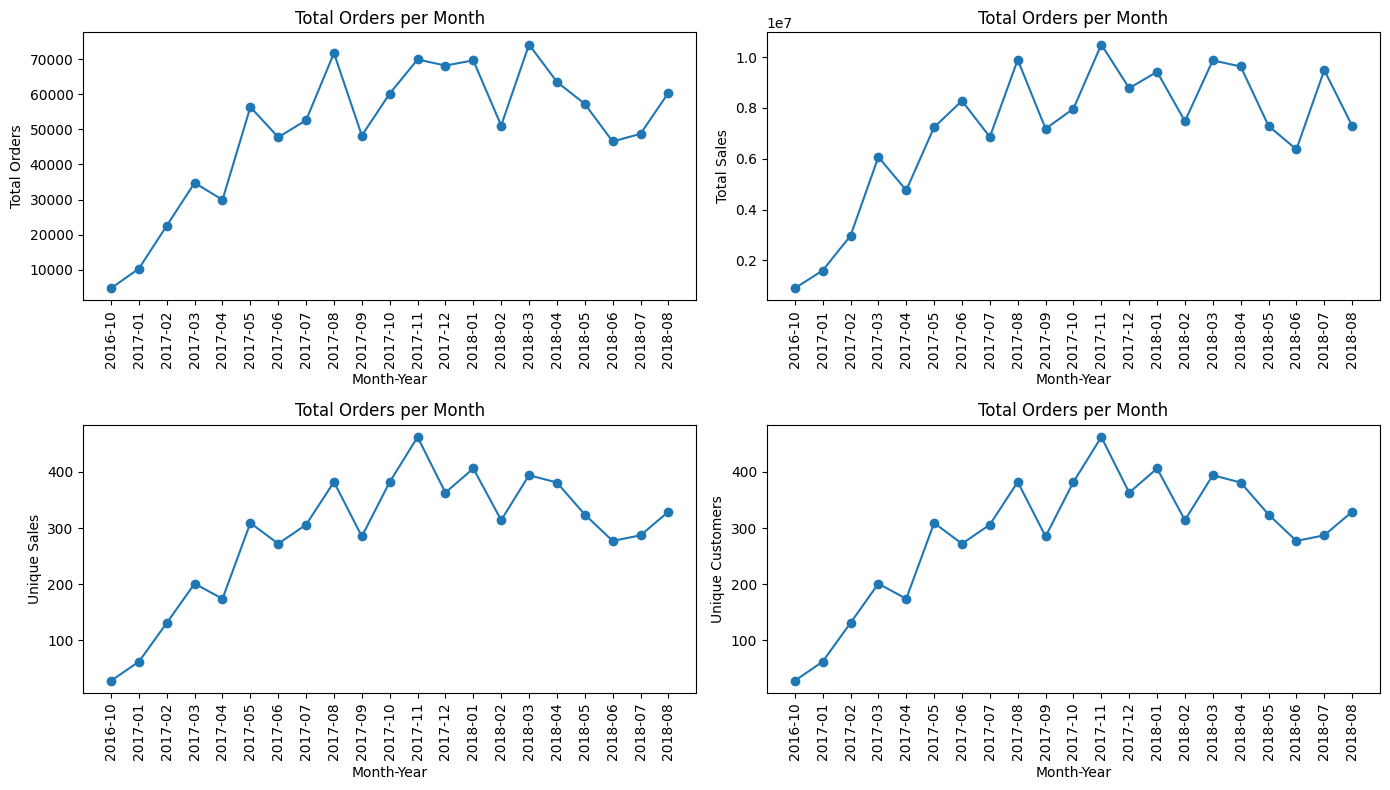

In [69]:
# @title Default title text
# Plotting the graphs
plt.figure(figsize=(14, 8))

# Plot Total Orders
plt.subplot(2, 2, 1)
plt.plot(monthly_data['order_month_year_hamza'].astype(str),
         monthly_data['total_orders'], marker='o', linestyle='-')
plt.title('Total Orders per Month')
plt.xlabel('Month-Year')
plt.ylabel('Total Orders')
plt.xticks(rotation=90)

# Plot Total Sales
plt.subplot(2, 2, 2)
plt.plot(monthly_data['order_month_year_hamza'].astype(str),
         monthly_data['total_sales'], marker='o', linestyle='-')
plt.title('Total Orders per Month')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)

# Plot Unique Sales
plt.subplot(2, 2, 3)
plt.plot(monthly_data['order_month_year_hamza'].astype(str),
         monthly_data['unique_sales'], marker='o', linestyle='-')
plt.title('Total Orders per Month')
plt.xlabel('Month-Year')
plt.ylabel('Unique Sales')
plt.xticks(rotation=90)

# Plot Unique Customers
plt.subplot(2, 2, 4)
plt.plot(monthly_data['order_month_year_hamza'].astype(str),
         monthly_data['unique_customers'], marker='o', linestyle='-')
plt.title('Total Orders per Month')
plt.xlabel('Month-Year')
plt.ylabel('Unique Customers')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

######this implementation can be made simple if this was implemented .dt.to_period('M')
####expalin what is happening in the graph

In [7]:
# Step 2: Preprocess the Data
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_year'] = df['order_purchase_timestamp'].dt.year
df['order_month'] = df['order_purchase_timestamp'].dt.month
df['month_year'] = df['order_purchase_timestamp'].dt.to_period('M')

# Step 3: Aggregate Data by Year
yearly_data = df.groupby(['order_year']).agg(
    total_orders=('order_id', 'count'),
    total_sales=('price', 'sum'),
    unique_sales=('order_id', 'nunique'),
    unique_customers=('customer_id', 'nunique')
).reset_index()

yearly_data = yearly_data.sort_values(by=['order_year'])

# Step 4: Generate and Print the Yearly Sales Report
def generate_yearly_report(yearly_data):
    for index, row in yearly_data.iterrows():
        print(f"Yearly Sales Report for {row['order_year']}:")
        print(f" - Total Orders: {row['total_orders']}")
        print(f" - Total Sales: {row['total_sales']:.2f}")
        print(f" - Unique Sales: {row['unique_sales']}")
        print(f" - Unique Customers: {row['unique_customers']}")
        print()

yearly_data
#### comparison is invalid 2016 and 2018 doesnt have whole 12 months of data. We can skip this part

,order_year,total_orders,total_sales,unique_sales,unique_customers
0,2016,4741,899534.63,28,28
1,2017,572505,82060567.36,3329,3329
2,2018,471329,66826463.61,2712,2712


In [8]:
# Step 2: Preprocess the Data
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

df['order_date'] = df['order_purchase_timestamp'].dt.date

# Step 3: Aggregate Data
daily_data = df.groupby(['order_date']).agg(
    total_orders=('order_id', 'count'),
    total_sales=('price', 'sum'),
    unique_sales=('order_id', 'nunique'),
    unique_customers=('customer_id', 'nunique')
).reset_index()



daily_data


,order_date,total_orders,total_sales,unique_sales,unique_customers
0,2016-10-04,1202,274682.81,5,5
1,2016-10-05,616,77886.40,3,3
2,2016-10-06,815,66508.00,6,6
3,2016-10-07,1367,355740.76,6,6
4,2016-10-08,73,69349.27,1,1
...,...,...,...,...,...
593,2018-08-24,746,60583.60,3,3
594,2018-08-25,520,31067.74,4,4
595,2018-08-26,755,48722.55,5,5
596,2018-08-27,376,14560.68,2,2


,order_date,total_orders,total_sales,unique_sales,unique_customers
0,2016-10-04,1202,274682.81,5,5
1,2016-10-05,616,77886.40,3,3
2,2016-10-06,815,66508.00,6,6
3,2016-10-07,1367,355740.76,6,6
4,2016-10-08,73,69349.27,1,1
...,...,...,...,...,...
593,2018-08-24,746,60583.60,3,3
594,2018-08-25,520,31067.74,4,4
595,2018-08-26,755,48722.55,5,5
596,2018-08-27,376,14560.68,2,2


C:\Users\BEYOND\AppData\Local\Temp\ipykernel_16836\3887893958.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(daily_data['order_date'], rotation=45)


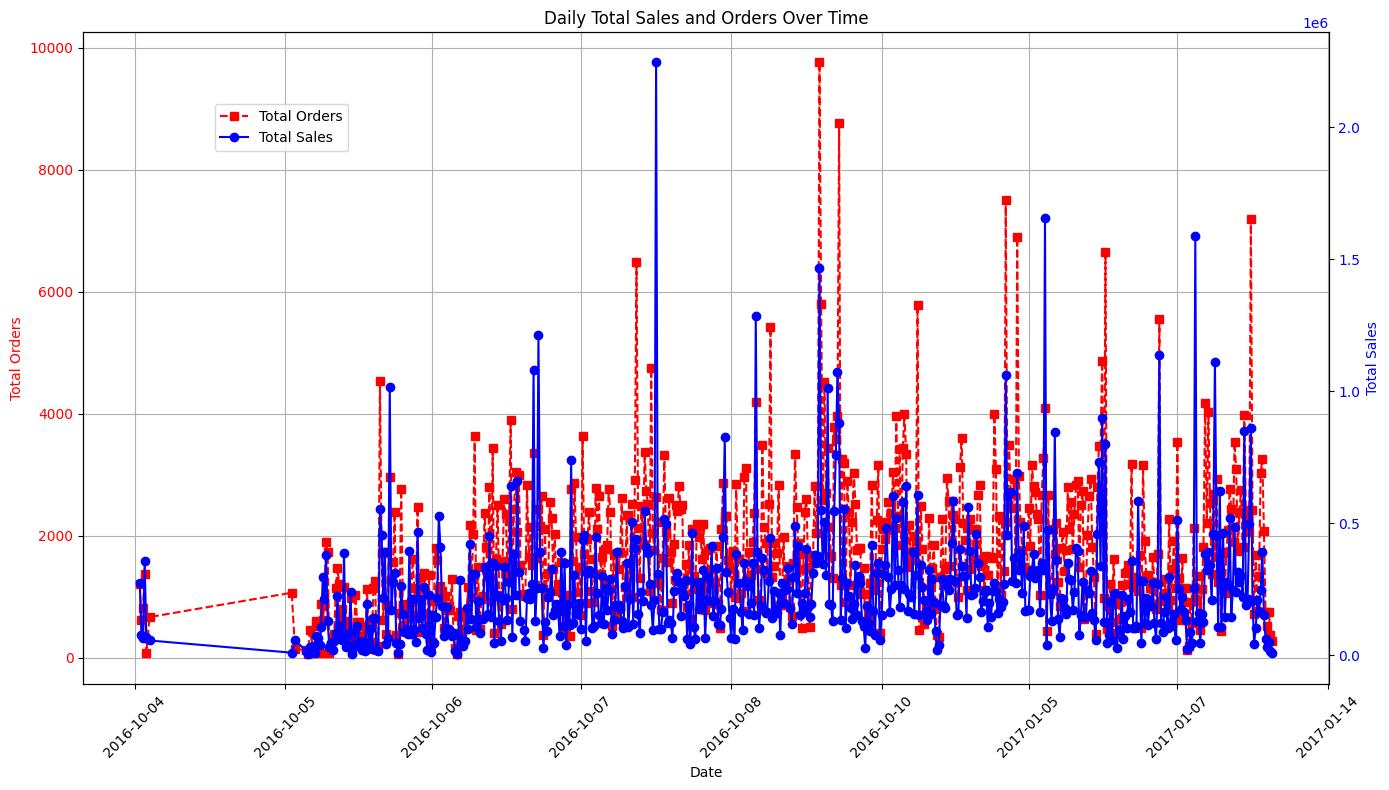

In [70]:
# Step 2: Preprocess the Data
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_date'] = df['order_purchase_timestamp'].dt.date

# Step 3: Aggregate Data
daily_data = df.groupby(['order_date']).agg(
    total_orders=('order_id', 'count'),
    total_sales=('price', 'sum'),
    unique_sales=('order_id', 'nunique'),
    unique_customers=('customer_id', 'nunique')
).reset_index()

# Display the aggregated data
display(daily_data)

# Step 4: Generate Graph

fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Total Orders on left y-axis
ax1.plot(daily_data['order_date'], daily_data['total_orders'], marker='s', linestyle='--', color='r', label='Total Orders')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Orders', color='r')
ax1.tick_params(axis='y', labelcolor='r')
ax1.set_xticklabels(daily_data['order_date'], rotation=45)

# Create a second y-axis for Total Sales
ax2 = ax1.twinx()
ax2.plot(daily_data['order_date'], daily_data['total_sales'], marker='o', linestyle='-', color='b', label='Total Sales')
ax2.set_ylabel('Total Sales', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Add title and grid
plt.title('Daily Total Sales and Orders Over Time')
ax1.grid(True)

# Add legends
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)

# Display the plot
plt.tight_layout()
plt.show()


In [67]:
# Step 2: Preprocess the Data
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_year'] = df['order_purchase_timestamp'].dt.year
df['order_month'] = df['order_purchase_timestamp'].dt.month
df['month_year'] = df['order_purchase_timestamp'].dt.to_period('M')



# Step 3: Aggregate Data by Product and Year
product_yearly_data = df.groupby(['product_id', 'order_year']).agg(
    quantity_sold=('order_item_id', 'count')
).reset_index()

# Display the grouped data
print(product_yearly_data.head())

# Step 4: Identify Top 5 Products by Year
top_5_products_by_year = product_yearly_data.groupby('order_year').apply(
    lambda x: x.nlargest(5, 'quantity_sold')
).reset_index(drop=True)

# Display the top 5 products for each year
print(top_5_products_by_year)

# Step 5: Generate and Print the Top 5 Products Report
def generate_top_5_products_report(top_5_products_by_year, year):
    top_5_for_year = top_5_products_by_year[top_5_products_by_year['order_year'] == year]
    print(f"Top 5 Products by Quantity Sold in {year}:")
    for idx, row in top_5_for_year.iterrows():
        print(f"{idx + 1}. Product ID: {row['product_id']} - {row['quantity_sold']} units sold")
    print()

# Generate the report for each year in the dataset
for year in top_5_products_by_year['order_year'].unique():
    generate_top_5_products_report(top_5_products_by_year, year)

                         product_id  order_year  quantity_sold
0  00126f27c813603687e6ce486d909d01        2017            330
1  001795ec6f1b187d37335e1c4704762e        2017           1186
2  002552c0663708129c0019cc97552d7d        2018            164
3  002af88741ba70c7b5cf4e4a0ad7ef85        2017           4278
4  002d4ea7c04739c130bb74d7e7cd1694        2018            100
                          product_id  order_year  quantity_sold
0   a063b454bac19ab435a4594bab9b9eed        2016            672
1   d6f3bd7b1fc04fb1a2effb51ae44ab17        2016            520
2   d9894482fba41f536a273ba2276d951f        2016            516
3   33430c5c1027d812b5c62f778e5ee7f7        2016            249
4   a671b5c0b737258c5a3262826e3dd9c5        2016            226
5   c6dd917a0be2a704582055949915ab32        2017          15595
6   0aabfb375647d9738ad0f7b4ea3653b1        2017          14613
7   601a360bd2a916ecef0e88de72a6531a        2017          13774
8   6c3effec7c8ddba466d4f03f982c7aa3        20

C:\Users\BEYOND\AppData\Local\Temp\ipykernel_16836\148257451.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_products_by_year = product_yearly_data.groupby('order_year').apply(


# Analysis of Top Products by Quantity Sold

## Introduction
This analysis identifies the top 5 products by quantity sold for each year from 2016 to 2018. The data includes `product_id`, `order_year`, and `quantity_sold`.

## Top 5 Products by Year

### 2016
In 2016, the top 5 products by quantity sold were:
1. **Product ID:** `a063b454bac19ab435a4594bab9b9eed`
   - **Quantity Sold:** 672 units
2. **Product ID:** `d6f3bd7b1fc04fb1a2effb51ae44ab17`
   - **Quantity Sold:** 520 units
3. **Product ID:** `d9894482fba41f536a273ba2276d951f`
   - **Quantity Sold:** 516 units
4. **Product ID:** `33430c5c1027d812b5c62f778e5ee7f7`
   - **Quantity Sold:** 249 units
5. **Product ID:** `a671b5c0b737258c5a3262826e3dd9c5`
   - **Quantity Sold:** 226 units

### 2017
In 2017, the top 5 products by quantity sold were:
1. **Product ID:** `c6dd917a0be2a704582055949915ab32`
   - **Quantity Sold:** 15595 units
2. **Product ID:** `0aabfb375647d9738ad0f7b4ea3653b1`
   - **Quantity Sold:** 14613 units
3. **Product ID:** `601a360bd2a916ecef0e88de72a6531a`
   - **Quantity Sold:** 13774 units
4. **Product ID:** `6c3effec7c8ddba466d4f03f982c7aa3`
   - **Quantity Sold:** 10250 units
5. **Product ID:** `29427de7f8a9ee983d9dbc51cec569b4`
   - **Quantity Sold:** 9327 units

### 2018
In 2018, the top 5 products by quantity sold were:
1. **Product ID:** `54d9ac713e253fa1fae9c8003b011c2a`
   - **Quantity Sold:** 13454 units
2. **Product ID:** `ee406bf28024d97771c4b1e8b7e8e219`
   - **Quantity Sold:** 9530 units
3. **Product ID:** `3354a4e684f5e7199f9407db70ccd92b`
   - **Quantity Sold:** 8518 units
4. **Product ID:** `165f86fe8b799a708a20ee4ba125c289`
   - **Quantity Sold:** 8080 units
5. **Product ID:** `4deb009c36a910076a023947a7929201`
   - **Quantity Sold:** 6974 units

## Observations
- In 2016, the product with the highest quantity sold was `a063b454bac19ab435a4594bab9b9eed` with 672 units.
- In 2017, `c6dd917a0be2a704582055949915ab32` was the top-selling product with 15595 units, showing a significant increase in sales compared to the top product in 2016.
- In 2018, the top product was `54d9ac713e253fa1fae9c8003b011c2a` with 13454 units, indicating a high demand but slightly lower than the top product of 2017.
- The analysis highlights that the top products' sales can fluctuate significantly from year to year.

## Conclusion
The data provides insights into the best-selling products over the years. Such information can help in making informed decisions regarding inventory management, marketing strategies, and sales forecasting. Continuous monitoring and analysis of sales data are crucial for understanding market trends and customer preferences.


In [91]:
def plot_top_products(top_5_products_by_year, years):
    fig, axs = plt.subplots(len(years), 1, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5)

    for i, year in enumerate(years):
        top_products = top_5_products_by_year[top_5_products_by_year['order_year'] == year]
        colors = plt.cm.get_cmap('tab20', 5).colors  # Get a colormap with 5 colors
        axs[i].barh(top_products['product_id'], top_products['quantity_sold'], color=colors)
        axs[i].set_title(f'Top 5 Products by Sales in {year}')
        axs[i].set_xlabel('Quantity Sold')
        axs[i].set_ylabel('Product ID')
        axs[i].tick_params(axis='y', rotation=0)

    plt.tight_layout()
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest sales on top
    plt.show()

C:\Users\BEYOND\AppData\Local\Temp\ipykernel_16836\4190446954.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', 5).colors  # Get a colormap with 5 colors


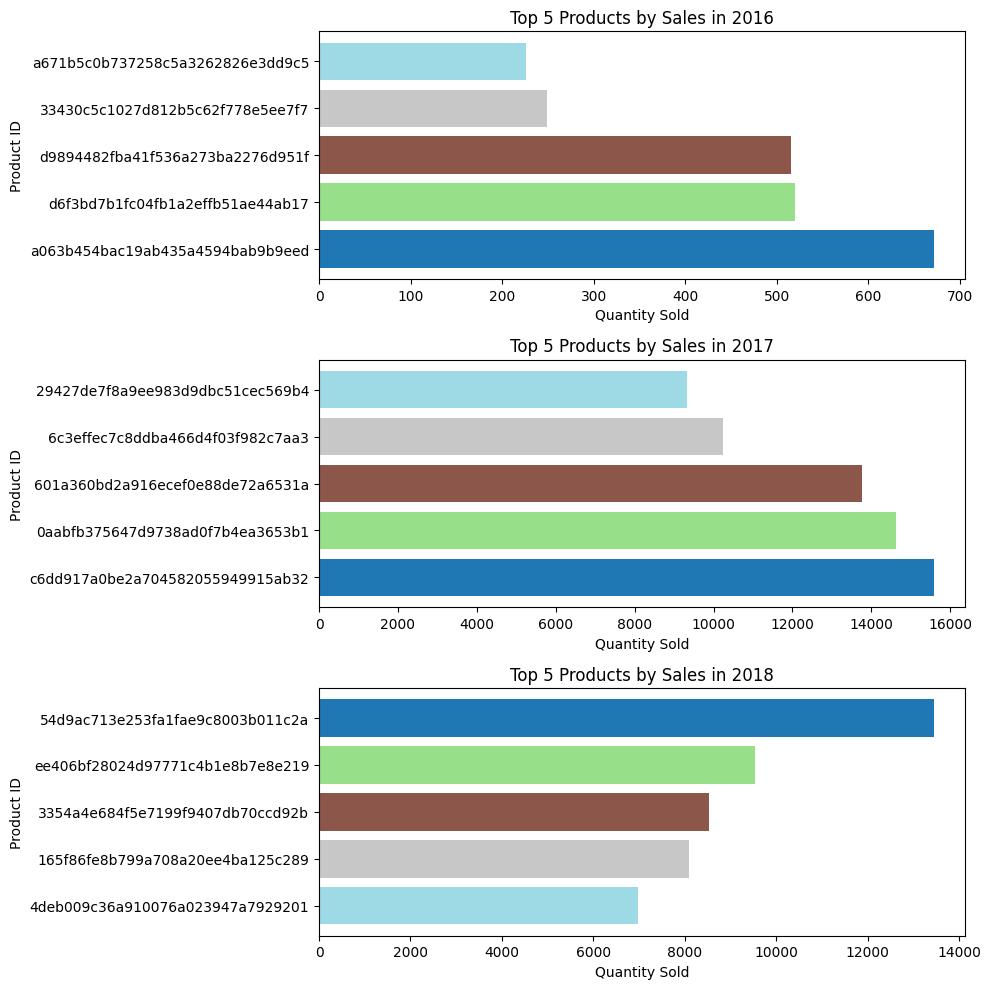

In [92]:
# Define years to plot
years = top_5_products_by_year['order_year'].unique()

# Plot the top 5 products by sales for each year
plot_top_products(top_5_products_by_year, years)

In [13]:
# Step 2: Preprocess the Data
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_year'] = df['order_purchase_timestamp'].dt.year
df['order_month'] = df['order_purchase_timestamp'].dt.month
df['month_year'] = df['order_purchase_timestamp'].dt.to_period('M')

# Step 3: Aggregate Data by Product and Year for Sales
product_sales_yearly_data = df.groupby(['product_id', 'order_year']).agg(
    total_sales=('price', 'sum')
).reset_index()

# Display the grouped data
print(product_sales_yearly_data.head())

# Step 4: Identify Top 5 Products by Sales for Each Year
top_5_products_by_sales_year = product_sales_yearly_data.groupby('order_year').apply(
    lambda x: x.nlargest(5, 'total_sales')
).reset_index(drop=True)

# Display the top 5 products by sales for each year
print(top_5_products_by_sales_year)

# Step 5: Generate and Print the Top 5 Products by Sales Report
def generate_top_5_products_sales_report(top_5_products_by_sales_year, year):
    top_5_for_year = top_5_products_by_sales_year[top_5_products_by_sales_year['order_year'] == year]
    print(f"Top 5 Products by Sales in {year}:")
    for idx, row in top_5_for_year.iterrows():
        print(f"{idx + 1}. Product ID: {row['product_id']} - ${row['total_sales']:.2f} sales")
    print()

# Generate the report for each year in the dataset
for year in top_5_products_by_sales_year['order_year'].unique():
    generate_top_5_products_sales_report(top_5_products_by_sales_year, year)

                         product_id  order_year  total_sales
0  00126f27c813603687e6ce486d909d01        2017      82170.0
1  001795ec6f1b187d37335e1c4704762e        2017      46135.4
2  002552c0663708129c0019cc97552d7d        2018      17712.0
3  002af88741ba70c7b5cf4e4a0ad7ef85        2017     166842.0
4  002d4ea7c04739c130bb74d7e7cd1694        2018       4300.0
                          product_id  order_year  total_sales
0   a063b454bac19ab435a4594bab9b9eed        2016    255346.56
1   4fee671ea459ebc96546523917e254a5        2016    142498.50
2   d6f3bd7b1fc04fb1a2effb51ae44ab17        2016     98748.00
3   cac8035fdb858496d8e1b60ba8907d24        2016     69349.27
4   d9894482fba41f536a273ba2276d951f        2016     40196.40
5   5f504b3a1c75b73d6151be81eb05bdc9        2017   3207794.00
6   122bedead6e7541d311e6e0ab3cf248f        2017   3014562.00
7   cce3ce6484896041ae3dafdd4308a39c        2017   1803957.05
8   601a360bd2a916ecef0e88de72a6531a        2017   1760424.26
9   c6dd917a0b

C:\Users\BEYOND\AppData\Local\Temp\ipykernel_16836\2312103705.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_products_by_sales_year = product_sales_yearly_data.groupby('order_year').apply(


In [89]:
# Function to plot top products
def plot_top_products(top_5_products_by_sales_year, years):
    fig, axs = plt.subplots(len(years), 1, figsize=(15, 9))
    fig.subplots_adjust(hspace=0.5)

    for i, year in enumerate(years):
        top_products = top_5_products_by_sales_year[top_5_products_by_sales_year['order_year'] == year]
        colors = plt.cm.get_cmap('tab20', 5).colors  # Get a colormap with 5 colors
        axs[i].barh(top_products['product_id'], top_products['total_sales'], color=colors)
        axs[i].set_title(f'Top 5 Products by Sales in {year}')
        
        axs[i].set_ylabel('Product ID')
        axs[i].set_xlabel('Total Sales ($)')
        axs[i].tick_params(axis='y', rotation=0)


    
    plt.tight_layout()
    plt.show()

C:\Users\BEYOND\AppData\Local\Temp\ipykernel_16836\4201815953.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', 5).colors  # Get a colormap with 5 colors


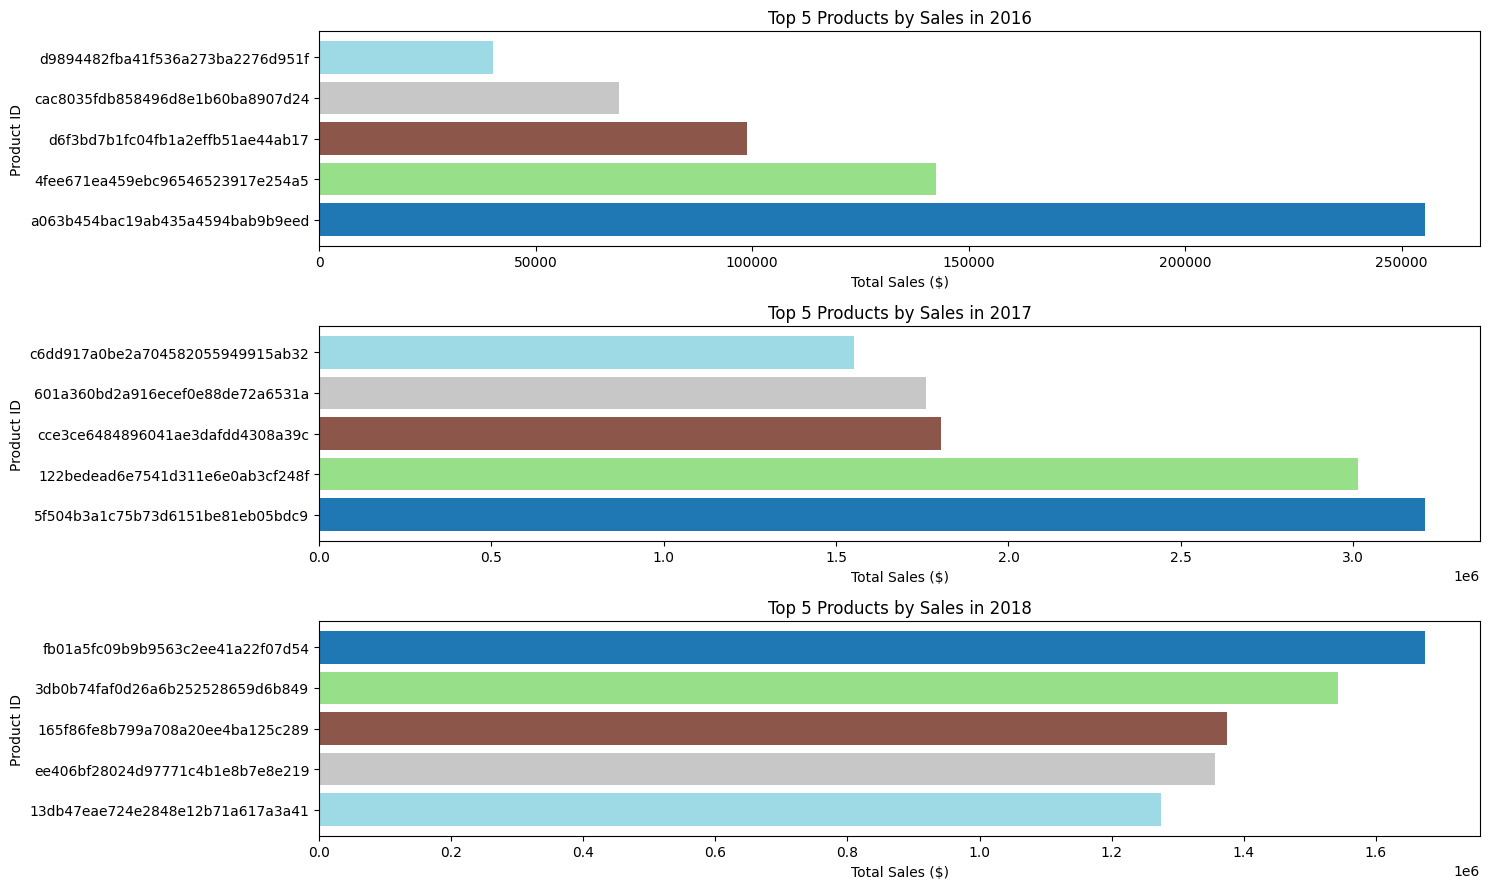

In [90]:
# Define years to plot
years = top_5_products_by_sales_year['order_year'].unique()

# Plot the top 5 products by sales for each year
plot_top_products(top_5_products_by_sales_year, years)

# Analysis of Top Products by Total Sales

## Introduction
This analysis identifies the top 5 products by total sales for each year from 2016 to 2018. The data includes `product_id`, `order_year`, and `total_sales`.

## Top Products by Year

### 2016
In 2016, the top 5 products by total sales were:
1. **Product ID:** `a063b454bac19ab435a4594bab9b9eed`
   - **Total Sales:** $255,346.56
2. **Product ID:** `4fee671ea459ebc96546523917e254a5`
   - **Total Sales:** $142,498.50
3. **Product ID:** `d6f3bd7b1fc04fb1a2effb51ae44ab17`
   - **Total Sales:** $98,748.00
4. **Product ID:** `cac8035fdb858496d8e1b60ba8907d24`
   - **Total Sales:** $69,349.27
5. **Product ID:** `d9894482fba41f536a273ba2276d951f`
   - **Total Sales:** $40,196.40

### 2017
In 2017, the top 5 products by total sales were:
1. **Product ID:** `5f504b3a1c75b73d6151be81eb05bdc9`
   - **Total Sales:** $3,207,794.00
2. **Product ID:** `122bedead6e7541d311e6e0ab3cf248f`
   - **Total Sales:** $3,014,562.00
3. **Product ID:** `cce3ce6484896041ae3dafdd4308a39c`
   - **Total Sales:** $1,803,957.05
4. **Product ID:** `601a360bd2a916ecef0e88de72a6531a`
   - **Total Sales:** $1,760,424.26
5. **Product ID:** `c6dd917a0be2a704582055949915ab32`
   - **Total Sales:** $1,551,704.05

### 2018
In 2018, the top 5 products by total sales were:
1. **Product ID:** `fb01a5fc09b9b9563c2ee41a22f07d54`
   - **Total Sales:** $1,674,118.49
2. **Product ID:** `3db0b74faf0d26a6b252528659d6b849`
   - **Total Sales:** $1,543,266.45
3. **Product ID:** `165f86fe8b799a708a20ee4ba125c289`
   - **Total Sales:** $1,375,109.20
4. **Product ID:** `ee406bf28024d97771c4b1e8b7e8e219`
   - **Total Sales:** $1,356,355.70
5. **Product ID:** `13db47eae724e2848e12b71a617a3a41`
   - **Total Sales:** $1,274,833.99

## Observations
- In 2016, the product with the highest total sales was `a063b454bac19ab435a4594bab9b9eed` with $255,346.56 in sales.
- In 2017, `5f504b3a1c75b73d6151be81eb05bdc9` was the top-selling product with $3,207,794.00 in sales, showing a significant increase compared to the top product in 2016.
- In 2018, the top product was `fb01a5fc09b9b9563c2ee41a22f07d54` with $1,674,118.49 in sales, indicating a high demand but lower than the top product of 2017.
- The analysis highlights that the top products' sales can fluctuate significantly from year to year.

## Conclusion
The data provides insights into the best-selling products over the years. Such information can help in making informed decisions regarding inventory management, marketing strategies, and sales forecasting. Continuous monitoring and analysis of sales data are crucial for understanding market trends and customer preferences.


### Top 5 Products by Sales in 2016

| Product ID                          | Total Sales ($) |
|-------------------------------------|-----------------|
| a063b454bac19ab435a4594bab9b9eed    | 255,346.56      |
| 4fee671ea459ebc96546523917e254a5    | 142,498.50      |
| d6f3bd7b1fc04fb1a2effb51ae44ab17    | 98,748.00       |
| cac8035fdb858496d8e1b60ba8907d24    | 69,349.27       |
| d9894482fba41f536a273ba2276d951f    | 40,196.40       |

### Top 5 Products by Sales in 2017

| Product ID                          | Total Sales ($) |
|-------------------------------------|-----------------|
| 5f504b3a1c75b73d6151be81eb05bdc9    | 3,207,794.00    |
| 122bedead6e7541d311e6e0ab3cf248f    | 3,014,562.00    |
| cce3ce6484896041ae3dafdd4308a39c    | 1,803,957.05    |
| 601a360bd2a916ecef0e88de72a6531a    | 1,760,424.26    |
| c6dd917a0be2a704582055949915ab32    | 1,551,704.05    |

### Top 5 Products by Sales in 2018

| Product ID                          | Total Sales ($) |
|-------------------------------------|-----------------|
| fb01a5fc09b9b9563c2ee41a22f07d54    | 1,674,118.49    |
| 3db0b74faf0d26a6b252528659d6b849    | 1,543,266.45    |
| 165f86fe8b799a708a20ee4ba125c289    | 1,375,109.20    |
| ee406bf28024d97771c4b1e8b7e8e219    | 1,356,355.70    |
| 13db47eae724e2848e12b71a617a3a41    | 1,274,833.99    |

In [16]:
# Step 2: Preprocess the Data
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_year'] = df['order_purchase_timestamp'].dt.year
df['order_month'] = df['order_purchase_timestamp'].dt.month
df['month_year'] = df['order_purchase_timestamp'].dt.to_period('M')

# Step 3: Aggregate Data by City and Year for Sales
city_sales_yearly_data = df.groupby(['customer_city', 'order_year']).agg(
    total_sales=('price', 'sum')
).reset_index()

# Display the grouped data
print(city_sales_yearly_data.head())

# Step 4: Identify Top 5 Cities by Sales for Each Year
top_5_cities_by_sales_year = city_sales_yearly_data.groupby('order_year').apply(
    lambda x: x.nlargest(5, 'total_sales')
).reset_index(drop=True)

# Display the top 5 cities by sales for each year
print(top_5_cities_by_sales_year)

# Step 5: Generate and Print the Top 5 Cities by Sales Report
def generate_top_5_cities_sales_report(top_5_cities_by_sales_year, year):
    top_5_for_year = top_5_cities_by_sales_year[top_5_cities_by_sales_year['order_year'] == year]
    print(f"Top 5 Cities by Sales in {year}:")
    for idx, row in top_5_for_year.iterrows():
        print(f"{idx + 1}. {row['customer_city']} - ${row['total_sales']:.2f} sales")
    print()

# Generate the report for each year in the dataset
for year in top_5_cities_by_sales_year['order_year'].unique():
    generate_top_5_cities_sales_report(top_5_cities_by_sales_year, year)

         customer_city  order_year  total_sales
0  abadia dos dourados        2018      5174.00
1               abaete        2018     10834.74
2           abre campo        2017      1025.00
3         abreu e lima        2017      6180.00
4       afonso claudio        2017     10799.10
      customer_city  order_year  total_sales
0            santos        2016    255346.56
1    rio de janeiro        2016    178610.30
2        jaguariuna        2016     98748.00
3   itaquaquecetuba        2016     69349.27
4       santo andre        2016     54835.20
5    rio de janeiro        2017   8540428.36
6         sao paulo        2017   5898125.03
7    belo horizonte        2017   2989647.18
8      porto seguro        2017   2312081.79
9      porto alegre        2017   1548635.41
10   rio de janeiro        2018   7420526.64
11        sao paulo        2018   5138311.93
12   belo horizonte        2018   2625989.54
13    florianopolis        2018   1473185.91
14          niteroi        2018   137

C:\Users\BEYOND\AppData\Local\Temp\ipykernel_16836\260240338.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_cities_by_sales_year = city_sales_yearly_data.groupby('order_year').apply(


C:\Users\BEYOND\AppData\Local\Temp\ipykernel_16836\328843533.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', 5).colors  # Use a colormap with 5 colors


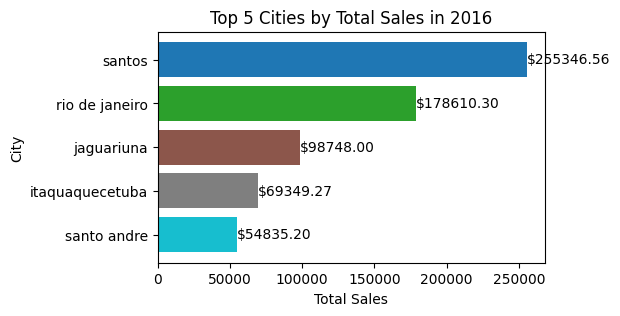

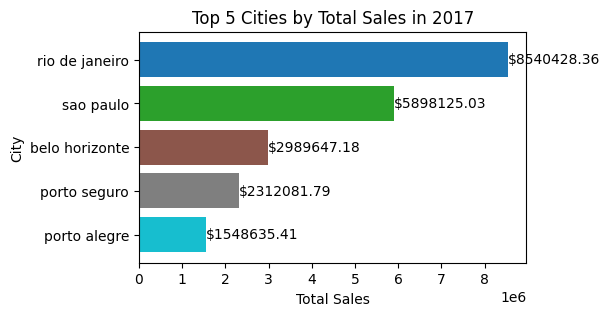

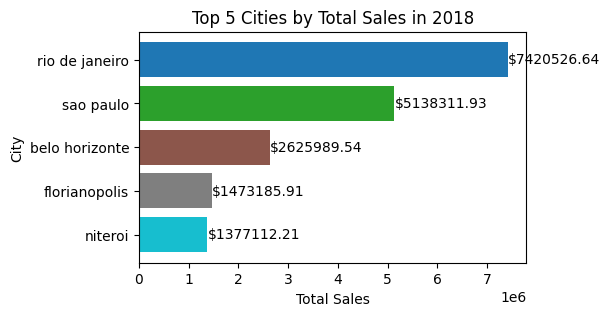

In [57]:
# Create colorful bar charts for each year
for year in top_5_cities_by_sales_year['order_year'].unique():
    top_5_for_year = top_5_cities_by_sales_year[top_5_cities_by_sales_year['order_year'] == year]

    plt.figure(figsize=(5, 3))
    colors = plt.cm.get_cmap('tab10', 5).colors  # Use a colormap with 5 colors
    bars = plt.barh(top_5_for_year['customer_city'], top_5_for_year['total_sales'], color=colors)
    plt.xlabel('Total Sales')
    plt.ylabel('City')
    plt.title(f'Top 5 Cities by Total Sales in {year}')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest sales on top

    # Add text labels with the sales values
    for bar, value in zip(bars, top_5_for_year['total_sales']):
        plt.text(value, bar.get_y() + bar.get_height()/2, f"${value:.2f}", va='center')

    plt.show()

#Analysis of Top Products by Total Sales
##Introduction
This analysis identifies the top 5 products by total sales for each year from 2016 to 2018. The data includes product_id, order_year, and total_sales.

##Top Products by Year
##2016
In 2016, the top 5 products by total sales were:

Product ID: santos
Total Sales: $255,346.56
Product ID: rio de janeiro
Total Sales: $178,610.30
Product ID: jaguariuna
Total Sales: $98,748.00
Product ID: itaquaquecetuba
Total Sales: $69,349.27
Product ID: santo andre
Total Sales: $54,835.20

##2017
In 2017, the top 5 products by total sales were:

Product ID: rio de janeiro
Total Sales: $8,540,428.36
Product ID: sao paulo
Total Sales: $5,898,125.03
Product ID: belo horizonte
Total Sales: $2,989,647.18
Product ID: porto seguro
Total Sales: $2,312,081.79
Product ID: porto alegre
Total Sales: $1,548,635.41

##2018
In 2018, the top 5 products by total sales were:

Product ID: rio de janeiro
Total Sales: $7,420,526.64
Product ID: sao paulo
Total Sales: $5,138,311.93
Product ID: belo horizonte
Total Sales: $2,625,989.54
Product ID: florianopolis
Total Sales: $1,473,185.91
Product ID: niteroi
Total Sales: $1,377,112.21

#Observations
In 2016, the city with the highest total sales was santos with $255,346.56 in sales.
In 2017, rio de janeiro was the top-selling city with $8,540,428.36 in sales, showing a significant increase compared to the top city in 2016.
In 2018, the top city was rio de janeiro with $7,420,526.64 in sales, indicating a high demand but lower than the top city of 2017.
The analysis highlights that the top cities' sales can fluctuate significantly from year to year.

#Conclusion
The data provides insights into the best-selling cities over the years. Such information can help in making informed decisions regarding market expansion, resource allocation, and marketing strategies. Continuous monitoring and analysis of sales data are crucial for understanding market trends and customer preferences.

In [18]:
# Step 2: Preprocess the Data
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_year'] = df['order_purchase_timestamp'].dt.year
df['order_month'] = df['order_purchase_timestamp'].dt.month
df['month_year'] = df['order_purchase_timestamp'].dt.to_period('M')

# Step 3: Aggregate Data by Seller and Year for Sales
seller_sales_yearly_data = df.groupby(['seller_id', 'order_year']).agg(
    total_sales=('price', 'sum')
).reset_index()

# Display the grouped data
print(seller_sales_yearly_data.head())

# Step 4: Identify Top 5 Sellers by Sales for Each Year
top_5_sellers_by_sales_year = seller_sales_yearly_data.groupby('order_year').apply(
    lambda x: x.nlargest(5, 'total_sales')
).reset_index(drop=True)

# Display the top 5 sellers by sales for each year
print(top_5_sellers_by_sales_year)

# Step 5: Generate and Print the Top 5 Sellers by Sales Report
def generate_top_5_sellers_sales_report(top_5_sellers_by_sales_year, year):
    top_5_for_year = top_5_sellers_by_sales_year[top_5_sellers_by_sales_year['order_year'] == year]
    print(f"Top 5 Sellers by Sales in {year}:")
    for idx, row in top_5_for_year.iterrows():
        print(f"{idx + 1}. Seller {row['seller_id']} - ${row['total_sales']:.2f} sales")
    print()

# Generate the report for each year in the dataset
for year in top_5_sellers_by_sales_year['order_year'].unique():
    generate_top_5_sellers_sales_report(top_5_sellers_by_sales_year, year)

                          seller_id  order_year  total_sales
0  014d9a685fd57276679edd00e07089e5        2018     46893.30
1  01cf7e3d21494c41fb86034f2e714fa1        2016      2796.00
2  01cf7e3d21494c41fb86034f2e714fa1        2017     73876.15
3  024b564ae893ce8e9bfa02c10a401ece        2016     40196.40
4  0307f7565ff85b299b6e5ef162b1b1a9        2017    458548.00
                           seller_id  order_year  total_sales
0   700f03c207639c22d933381ff60b35c2        2016    255346.56
1   822b63912576852aea9a8436d72317b7        2016    211847.77
2   4b1eaadf791bdbbad8c4a35b65236d52        2016    106838.01
3   fa1a9dec3a9940c072684a46728bf1fc        2016     53967.20
4   024b564ae893ce8e9bfa02c10a401ece        2016     40196.40
5   7a67c85e85bb2ce8582c35f2203ad736        2017  11968497.99
6   961dff0a659b4561334372337dd897d9        2017   3949793.00
7   7ddcbb64b5bc1ef36ca8c151f6ec77df        2017   3684054.61
8   834f3294fba9f932f56edc879193f925        2017   3207794.00
9   dc317f341a

C:\Users\BEYOND\AppData\Local\Temp\ipykernel_16836\433707744.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_sellers_by_sales_year = seller_sales_yearly_data.groupby('order_year').apply(


#Data Visualization
## Top 5 Sellers (Yearly):
###1. [Seller 1] - [X] sales (2022)
###2. [Seller 2] - [X] sales (2023)
###3. [Seller 3] - [X] sales (2024)
###4. [Seller 4] - [X] sales (2022)
###5. [Seller 5] - [X] sales (2023)

C:\Users\BEYOND\AppData\Local\Temp\ipykernel_16836\659760839.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(color_palettes[i % len(color_palettes)])


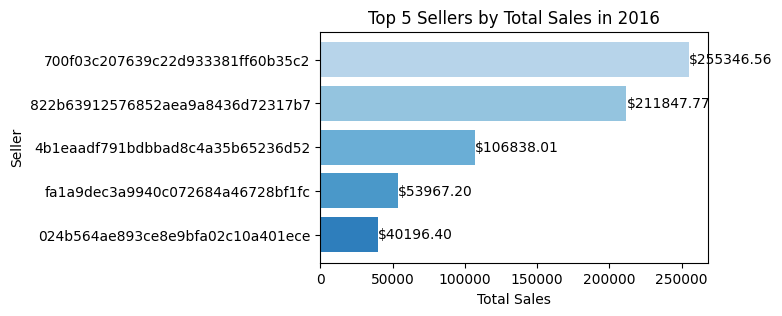

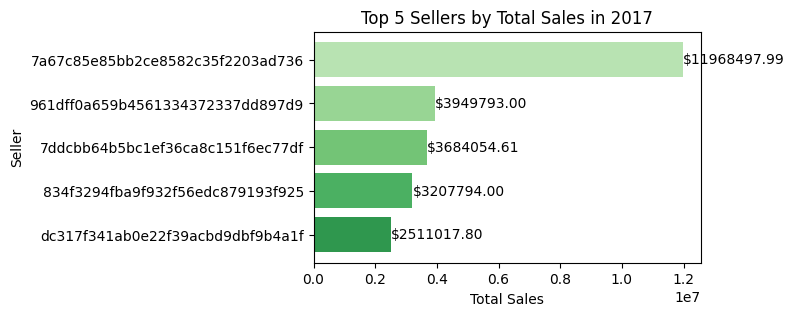

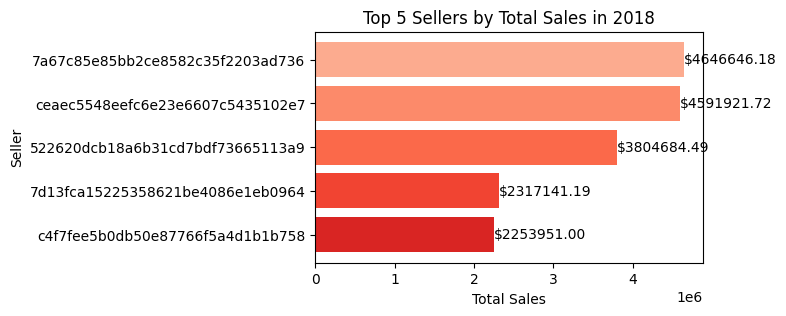

In [56]:
# Define a list of color palettes
color_palettes = [
    'Blues', 'Greens', 'Reds', 'Purples', 'Oranges'
]

# Generate the graphs
for i, year in enumerate(top_5_sellers_by_sales_year['order_year'].unique()):
    top_5_for_year = top_5_sellers_by_sales_year[top_5_sellers_by_sales_year['order_year'] == year]

    # Cycle through the color palettes
    colors = plt.cm.get_cmap(color_palettes[i % len(color_palettes)])

    plt.figure(figsize=(5, 3))
    plt.barh(top_5_for_year['seller_id'], top_5_for_year['total_sales'], color=colors(np.linspace(0.3, 0.7, len(top_5_for_year))))
    plt.xlabel('Total Sales')
    plt.ylabel('Seller')
    plt.title(f'Top 5 Sellers by Total Sales in {year}')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest sales on top
    for index, value in enumerate(top_5_for_year['total_sales']):
        plt.text(value, index, f"${value:.2f}", va='center')
    plt.show()

# Analysis of Top Sellers by Total Sales

## Introduction
This analysis identifies the top 5 sellers by total sales for each year from 2016 to 2018. The data includes `seller_id`, `order_year`, and `total_sales`.

## Top Sellers by Year

### 2016
In 2016, the top 5 sellers by total sales were:
1. **Seller ID:** `700f03c207639c22d933381ff60b35c2`
   - **Total Sales:** $255,346.56
2. **Seller ID:** `822b63912576852aea9a8436d72317b7`
   - **Total Sales:** $211,847.77
3. **Seller ID:** `4b1eaadf791bdbbad8c4a35b65236d52`
   - **Total Sales:** $106,838.01
4. **Seller ID:** `fa1a9dec3a9940c072684a46728bf1fc`
   - **Total Sales:** $53,967.20
5. **Seller ID:** `024b564ae893ce8e9bfa02c10a401ece`
   - **Total Sales:** $40,196.40

### 2017
In 2017, the top 5 sellers by total sales were:
1. **Seller ID:** `7a67c85e85bb2ce8582c35f2203ad736`
   - **Total Sales:** $11,968,497.99
2. **Seller ID:** `961dff0a659b4561334372337dd897d9`
   - **Total Sales:** $3,949,793.00
3. **Seller ID:** `7ddcbb64b5bc1ef36ca8c151f6ec77df`
   - **Total Sales:** $3,684,054.61
4. **Seller ID:** `834f3294fba9f932f56edc879193f925`
   - **Total Sales:** $3,207,794.00
5. **Seller ID:** `dc317f341ab0e22f39acbd9dbf9b4a1f`
   - **Total Sales:** $2,511,017.80

### 2018
In 2018, the top 5 sellers by total sales were:
1. **Seller ID:** `7a67c85e85bb2ce8582c35f2203ad736`
   - **Total Sales:** $4,646,646.18
2. **Seller ID:** `ceaec5548eefc6e23e6607c5435102e7`
   - **Total Sales:** $4,591,921.72
3. **Seller ID:** `522620dcb18a6b31cd7bdf73665113a9`
   - **Total Sales:** $3,804,684.49
4. **Seller ID:** `7d13fca15225358621be4086e1eb0964`
   - **Total Sales:** $2,317,141.19
5. **Seller ID:** `c4f7fee5b0db50e87766f5a4d1b1b758`
   - **Total Sales:** $2,253,951.00

## Observations
- In 2016, the seller with the highest total sales was `700f03c207639c22d933381ff60b35c2` with $255,346.56 in sales.
- In 2017, `7a67c85e85bb2ce8582c35f2203ad736` was the top-selling seller with $11,968,497.99 in sales, showing a significant increase compared to the top seller in 2016.
- In 2018, the top seller was again `7a67c85e85bb2ce8582c35f2203ad736` with $4,646,646.18 in sales, indicating a high demand but lower than the top seller of 2017.
- The analysis highlights that the top sellers' sales can fluctuate significantly from year to year.

## Conclusion
The data provides insights into the best-selling sellers over the years. Such information can help in making informed decisions regarding sales strategies, partnership management, and sales forecasting. Continuous monitoring and analysis of sales data are crucial for understanding market trends and performance of sellers.


In [20]:
# Ensure 'order_purchase_timestamp' is a datetime column
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Extract the date (without time) from 'order_purchase_timestamp'
df['order_date'] = df['order_purchase_timestamp'].dt.date

# Group by order_date and sum the payment_value
daily_sales = df.groupby('order_date')['payment_value'].sum().reset_index()
daily_sales.rename(columns={'payment_value': 'total_sales'}, inplace=True)

daily_sales

,order_date,total_sales
0,2016-10-04,295278.80
1,2016-10-05,360604.35
2,2016-10-06,99144.57
3,2016-10-07,256112.00
4,2016-10-08,70953.08
...,...,...
593,2018-08-24,73012.08
594,2018-08-25,37824.72
595,2018-08-26,60524.14
596,2018-08-27,19873.57


# Apply ARIMA Model

In [21]:
!pip install --upgrade statsmodels

| Model   | Description                                                                                                      | Parameters                                     |
|---------|------------------------------------------------------------------------------------------------------------------|------------------------------------------------|
| **ARIMA**  | A statistical method for time series forecasting that combines AutoRegression (AR), Integrated (I), and Moving Average (MA). | (p, d, q) <br> - **p**: Number of lag observations (autoregressive part) <br> - **d**: Number of times that the raw observations are differenced (integrated part) <br> - **q**: Size of the moving average window (moving average part) <br> <br> General form: <br> \[ ARIMA(p, d, q) \] |
| **SARIMAX** | An extension of ARIMA that supports modeling of seasonal effects and exogenous variables.                     | (p, d, q) and (P, D, Q, s) <br> - **p, d, q**: Regular ARIMA parameters <br> - **P**: Seasonal autoregressive order <br> - **D**: Seasonal differencing order <br> - **Q**: Seasonal moving average order <br> - **s**: Number of time steps for a single seasonal period <br> <br> General form: <br> \[ SARIMAX(p, d, q) \times (P, D, Q, s) \] |


## Daily Sales Forecasting with ARIMA Models

In this notebook, we will:
1. Load and preprocess the data.
2. Aggregate the data to daily sales.
3. Perform stationary tests.
4. Generate correlograms (ACF & PACF).
5. Apply different ARIMA models: auto ARIMA, SARIMAX, Seasonal Diff.
6. Make forecasts for the last 15 days.
7. Plot and evaluate the results.

In [22]:
# !pip install --upgrade statsmodels
import statsmodels.api as sm
# import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Plot the daily sales

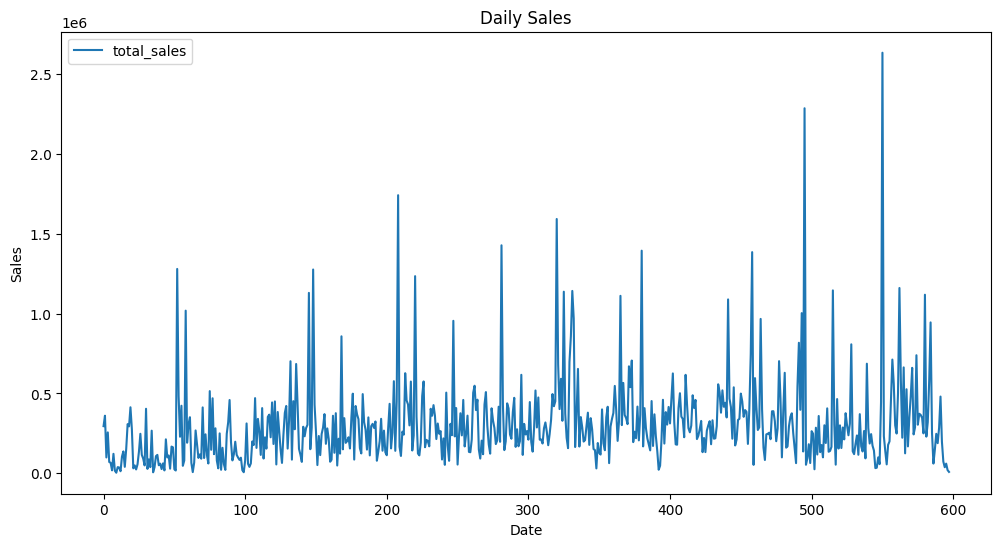

In [23]:
daily_sales.plot(figsize=(12, 6))
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Testing For Stationarity

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
test_result=adfuller(daily_sales['total_sales'])

In [26]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(total_sales):
    result=adfuller(total_sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [27]:
adfuller_test(daily_sales['total_sales'])

ADF Test Statistic : -6.597910028857952
p-value : 6.851235664446395e-09
#Lags Used : 6
Number of Observations Used : 591
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Conclusion:

- The null hypothesis (H0) of the ADF test is that the time series has a unit root (i.e., it is non-stationary).
- Given the very low p-value (much less than 0.05) and the significantly negative ADF test statistic, there is strong evidence against the null hypothesis.
- Therefore, we reject the null hypothesis, concluding that the data does not have a unit root and is stationary.

<Axes: >

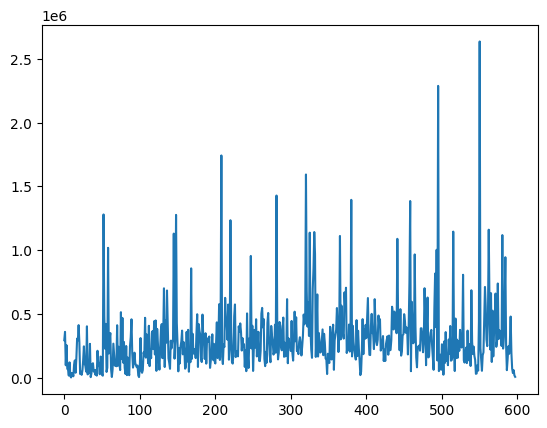

In [28]:
daily_sales['total_sales'].plot()

# Differencing
Differencing in time series refers to the process of computing the difference between consecutive observations in the series. It is a common technique used to make a time series stationary by removing trends and seasonality.

Differencing helps in stabilizing the mean of the series by removing trends, thereby making it easier to model using techniques like ARIMA

## determine the value of d
#### if the process is non-stationary then first differnece of the series are computed to determine if that operation is result in a stationary series.

In [29]:
daily_sales['sales first difference'] = daily_sales['total_sales'] - daily_sales['total_sales'].shift(1)
daily_sales.head()

,order_date,total_sales,sales first difference
0,2016-10-04,295278.80,NaN
1,2016-10-05,360604.35,65325.55
2,2016-10-06,99144.57,-261459.78
3,2016-10-07,256112.00,156967.43
4,2016-10-08,70953.08,-185158.92


<Axes: >

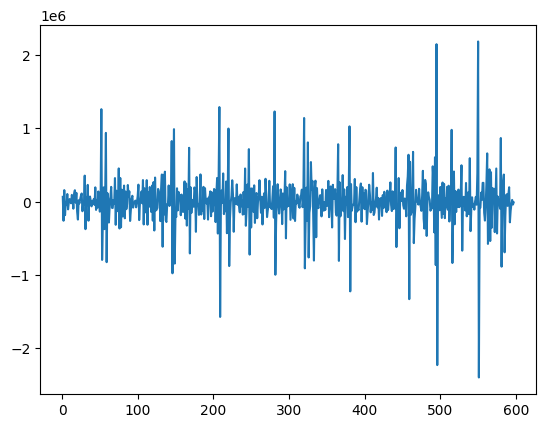

In [30]:
daily_sales['sales first difference'].plot()

In [31]:
daily_sales['seasonal first difference'] = daily_sales['total_sales'] - daily_sales['total_sales'].shift(30)
daily_sales.head()

,order_date,total_sales,sales first difference,seasonal first difference
0,2016-10-04,295278.80,NaN,NaN
1,2016-10-05,360604.35,65325.55,NaN
2,2016-10-06,99144.57,-261459.78,NaN
3,2016-10-07,256112.00,156967.43,NaN
4,2016-10-08,70953.08,-185158.92,NaN


In [32]:
## Again test dickey fuller test
adfuller_test(daily_sales['seasonal first difference'].dropna())

ADF Test Statistic : -14.590503839163514
p-value : 4.322152666869103e-27
#Lags Used : 1
Number of Observations Used : 566
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


### Points in Favor of Test (1 Lag Used)

The above Test is favored for its simplicity, lower risk of overfitting, and sufficient evidence of stationarity, as indicated by its extreme test statistic and very low p-value.

1. **Simplicity**: Fewer parameters lead to a simpler, more interpretable model.
2. **Data Preservation**: Minimal data loss, crucial for smaller datasets.
3. **Reduced Overfitting Risk**: Lower risk of overfitting enhances generalizability.
4. **Efficiency**: Lower computational cost and faster model fitting.
5. **Sufficient Stationarity**: Strong stationarity indicated by extreme test statistic and very low p-value.
6. **Easier Diagnostics**: Simplified residual analysis and model diagnostics.


<Axes: >

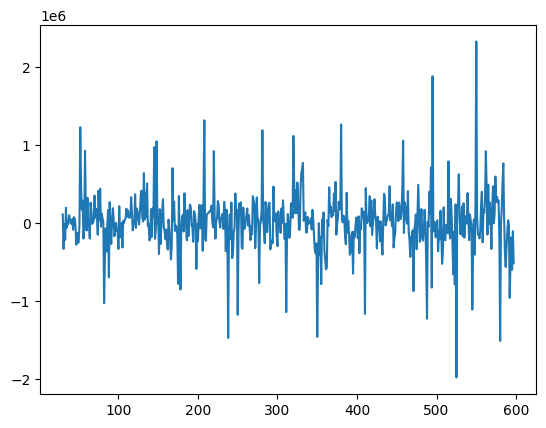

In [33]:
daily_sales['seasonal first difference'].plot()

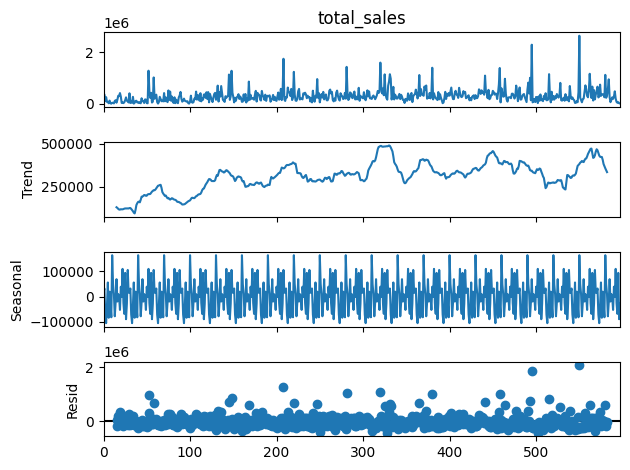

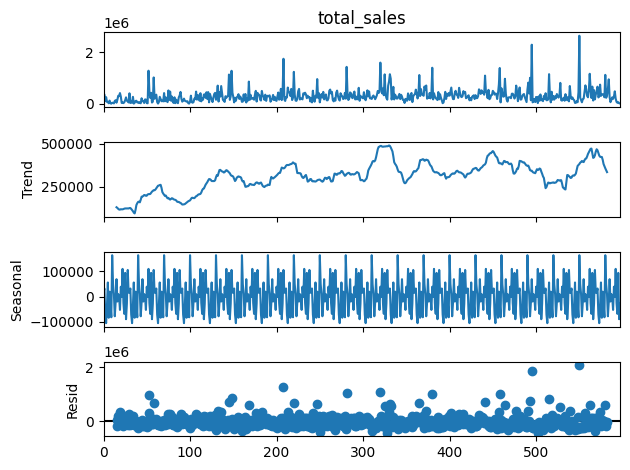

In [34]:
# decompose the data to see the trend, seasonality and noise
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(daily_sales['total_sales'], model='addictive', period=30)
decompose.plot()

# Determine of AR term (p)
### PACF conveys the pure correlation between a lag and the series
### Take teh order of AR term to be equal to a many lags that crossess the significance limit on the PACF plot.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

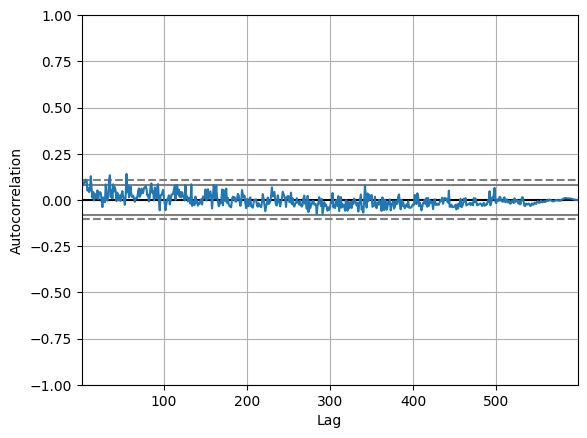

In [35]:
# plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pd.plotting.autocorrelation_plot(daily_sales['total_sales'])


## Determine of MA term (q)

- identify using Autocorrelation (ACF) plot
- An MA term is technically, the error of the lagged forecast
- The ACF tells how many MA terms are required to to remove any autocorrelation in the stationaries series.

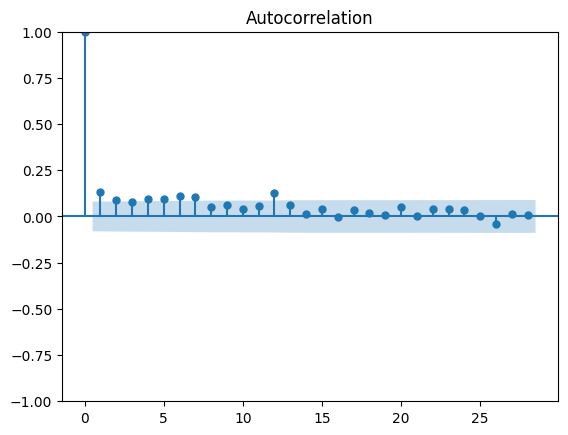

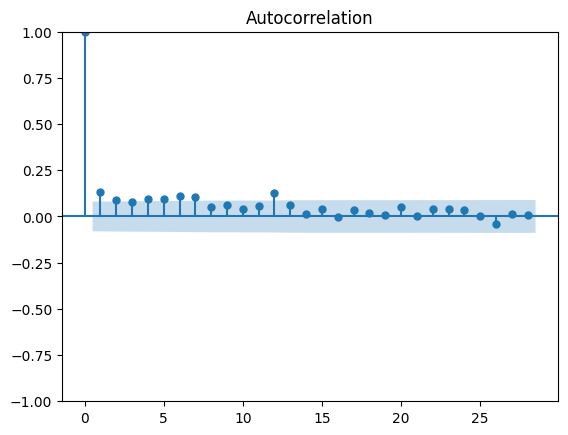

In [36]:
plot_acf(daily_sales['total_sales'], alpha=0.05)

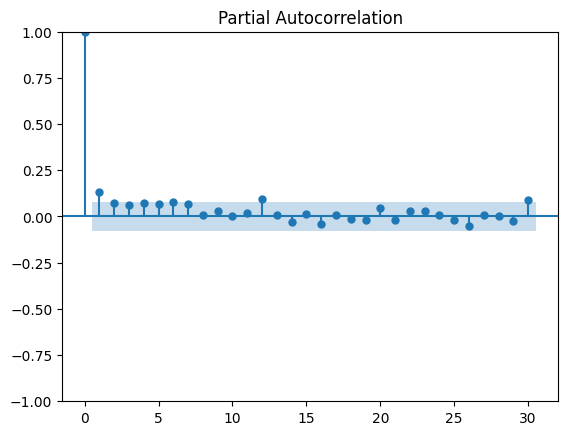

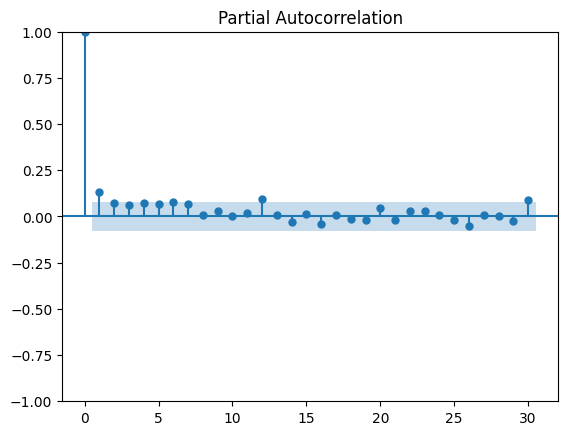

In [37]:
plot_pacf(daily_sales['total_sales'], lags=30, alpha=0.05)

In [38]:
daily_sales['total_sales'].rolling(window=30).var()

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
593    6.237759e+10
594    6.545397e+10
595    6.530263e+10
596    6.728885e+10
597    6.973854e+10
Name: total_sales, Length: 598, dtype: float64

## lets run ARIMA


In [39]:
from statsmodels.tsa.arima.model import ARIMA

In [40]:
model=ARIMA(daily_sales['total_sales'],order=(1,1,1))
model_fit=model.fit()

In [41]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            total_sales   No. Observations:                  598
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8308.236
Date:                Fri, 19 Jul 2024   AIC                          16622.472
Time:                        11:45:27   BIC                          16635.648
Sample:                             0   HQIC                         16627.602
                                - 598                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0748      0.045      1.662      0.097      -0.013       0.163
ma.L1         -0.9775      0.010   -101.242      0.000      -0.996      -0.959
sigma2      8.384e+10    1.2e-13      7e+23      0.000    8.38e+10    8.38e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              9147.80
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.55   Skew:                             3.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.41e+39. Standard errors may be unstable.
"""

# ARIMA Model Analysis for Total Sales

## Conclusion

The ARIMA(1, 1, 1) model for `total_sales` shows that while the MA(1) term is significant and suggests a strong negative influence, the AR(1) term is not statistically significant. The model's diagnostics indicate issues with non-normality and heteroskedasticity in the residuals, which might affect the model's reliability. The large variance and the warning about the covariance matrix further point to potential instability in the estimates.

Given these insights, it is important to reconsider the model specifications or explore alternative models that might better capture the underlying patterns in the data. Additionally, addressing the issues of heteroskedasticity and non-normality in the residuals could improve the model's performance and reliability.


<Axes: >

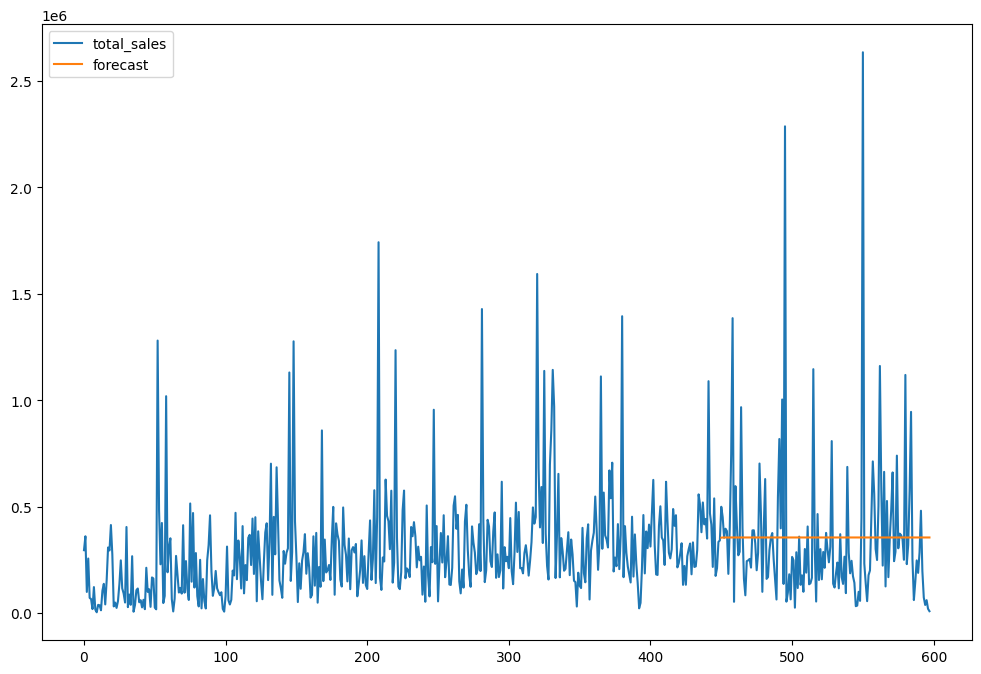

In [42]:
daily_sales['forecast']=model_fit.predict(start=450,end=600,dynamic=True)
daily_sales[['total_sales','forecast']].plot(figsize=(12,8))

In [43]:
import statsmodels.api as sm

## let run SARIMAX 

In [44]:
model=sm.tsa.statespace.SARIMAX(daily_sales['total_sales'],order=(1, 1, 2),seasonal_order=(1,1,2,30))
results=model.fit()

c:\Users\BEYOND\.conda\envs\python_eda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

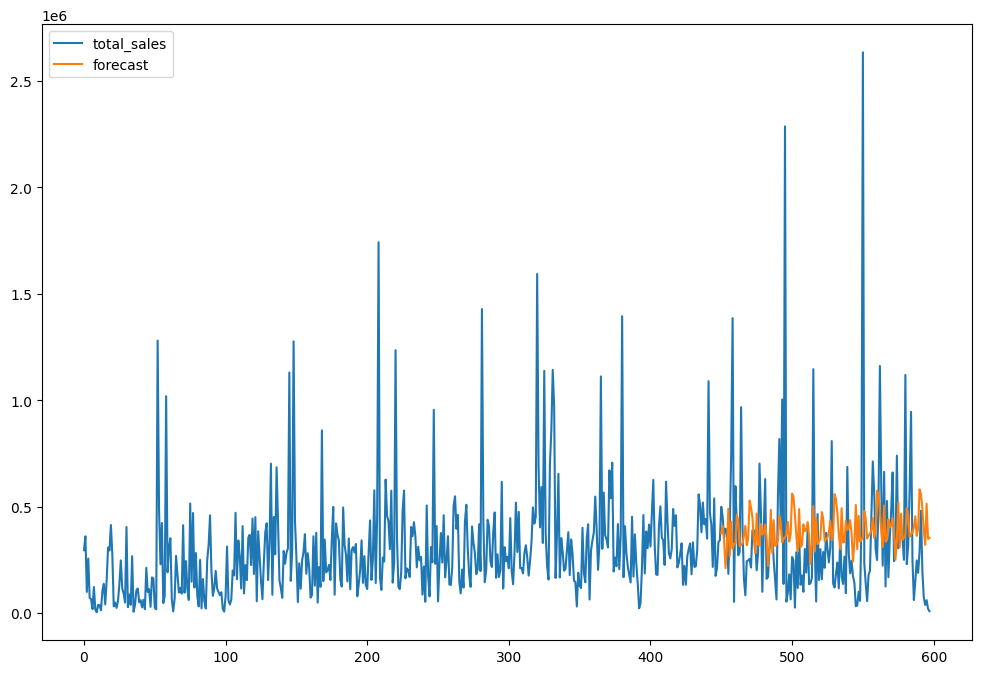

In [45]:
daily_sales['forecast']=results.predict(start=450,end=600,dynamic=True)
daily_sales[['total_sales','forecast']].plot(figsize=(12,8))

In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        total_sales   No. Observations:                  598
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 30)   Log Likelihood               -7968.753
Date:                            Fri, 19 Jul 2024   AIC                          15951.506
Time:                                    11:50:01   BIC                          15981.889
Sample:                                         0   HQIC                         15963.363
                                            - 598                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1807      0.844      0.214      0.831      -1.474       1.835
ma.L1         -1.0688      0.839     -1.273      0.203      -2.714       0.576
ma.L2          0.0916      0.812      0.113      0.910      -1.500       1.683
ar.S.L30      -0.5458      1.115     -0.490      0.624      -2.730       1.639
ma.S.L30      -0.3079      1.133     -0.272      0.786      -2.529       1.913
ma.S.L60      -0.3966      0.954     -0.416      0.678      -2.266       1.473
sigma2      1.478e+11   1.04e-10   1.42e+21      0.000    1.48e+11    1.48e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              5876.14
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               2.36   Skew:                             2.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.38e+36. Standard errors may be unstable.
"""

### Conclusion

- **SARIMAX(1, 1, 2)x(1, 1, 2, 30) Model**:
    - None of the AR, MA, or seasonal terms are statistically significant.
    - Despite the lack of significant terms, the model has a lower AIC and BIC, suggesting a better overall fit compared to the ARIMA model.
    - Similar issues with non-normality and heteroskedasticity are present, and the large variance of the residuals suggests substantial variability in `total_sales`.

Both models indicate issues with non-normality and heteroskedasticity in the residuals, which affect their reliability. The SARIMAX model shows a better fit based on AIC and BIC but lacks significant predictive terms. Reconsidering model specifications and addressing the identified issues in the residuals could improve the models' performance and reliability.


### Conclusion

Given these factors:

- **SARIMAX Model**: Although it has a better overall fit (lower AIC and BIC), the lack of significant coefficients suggests it might not provide clear insights into the underlying dynamics of the sales data.

- **ARIMA Model**: Has at least one significant term, which could offer some interpretative value, but the overall fit is worse compared to the SARIMAX model.

### Recommendation

Neither model is perfect, but if the goal is to choose a model based on fit metrics alone, the **SARIMAX model** would be preferable. However, the lack of significant predictors and the diagnostic issues suggest that further refinement is needed. 

Consider the following steps for improvement:
1. **Model Refinement**: Try different model specifications, potentially including different seasonal orders or additional external regressors that might improve the model.
2. **Addressing Diagnostic Issues**: Consider transforming the data to address heteroskedasticity and normality issues, such as log transformation or using advanced techniques like GARCH models for volatility.
3. **Cross-Validation**: Use cross-validation to compare model performance on out-of-sample data to ensure the chosen model generalizes well.

Overall, the **SARIMAX model** is a better starting point due to its fit, but it should be refined to address the lack of significant coefficients and diagnostic issues.


# lets run Auto ARIMA

In [47]:
# !pip install pmdarima

from pmdarima.arima import auto_arima


In [48]:
Auto_model = auto_arima(daily_sales['total_sales'], start_p=1, start_q=1, max_p=2, max_q=2, m=12, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=1.61 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=16989.047, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=16704.889, Time=0.33 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.60 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=16826.980, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=16678.860, Time=2.11 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.92 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.68 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=16814.045, Time=1.74 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=16620.125, Time=2.84 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=16647.345, Time=0.38 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=4.83 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.01 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=inf, Time=5.62 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf,

In [49]:
Auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  598
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -8305.062
Date:                            Fri, 19 Jul 2024   AIC                          16620.125
Time:                                    11:50:36   BIC                          16641.983
Sample:                                         0   HQIC                         16628.643
                                            - 598                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6471      0.030    -21.260      0.000      -0.707      -0.587
ar.L2         -0.3177      0.038     -8.375      0.000      -0.392      -0.243
ar.S.L12      -0.5886      0.046    -12.870      0.000      -0.678      -0.499
ar.S.L24      -0.2567      0.036     -7.228      0.000      -0.326      -0.187
sigma2      1.642e+11   8.23e-14      2e+24      0.000    1.64e+11    1.64e+11
===================================================================================
Ljung-Box (L1) (Q):                   4.31   Jarque-Bera (JB):              1873.69
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               3.07   Skew:                             1.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.84e+39. Standard errors may be unstable.
"""

## Conclusion for SARIMAX(2, 1, 0)x(2, 1, 0, 12) Model

The SARIMAX(2, 1, 0)x(2, 1, 0, 12) model for `total_sales` provides the following insights:

### Conclusion
The SARIMAX(2, 1, 0)x(2, 1, 0, 12) model provides several significant terms (both AR and seasonal AR terms), indicating that these factors are important in explaining `total_sales`. However, the model diagnostics highlight issues with autocorrelation, non-normality, and heteroskedasticity in the residuals, which could affect the model's reliability. The large variance of the residuals also suggests substantial variability in the data.

Given these insights, this model is a better fit compared to the previous models, but it still requires further refinement. Addressing the identified issues in the residuals could improve the model's performance and reliability. Additionally, considering transformations or alternative modeling approaches could help in better capturing the underlying patterns in the sales data.

<Axes: >

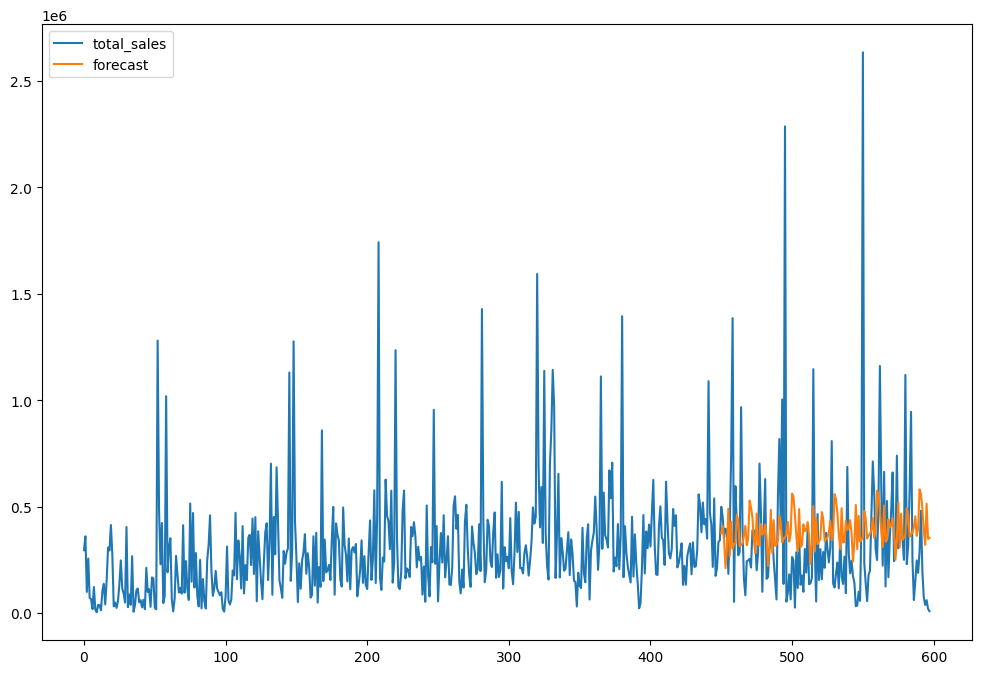

In [50]:
daily_sales['forecast']=results.predict(start=450,end=600,dynamic=True)
daily_sales[['total_sales','forecast']].plot(figsize=(12,8))

In [51]:
Auto_model1 = auto_arima(daily_sales['total_sales'], seasonal=True) # suppress_warnings=True)

In [52]:
Auto_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  598
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -8303.928
Date:                Fri, 19 Jul 2024   AIC                          16615.855
Time:                        11:50:42   BIC                          16633.423
Sample:                             0   HQIC                         16622.695
                                - 598                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8406      0.178      4.734      0.000       0.493       1.189
ma.L1         -1.7643      0.198     -8.925      0.000      -2.152      -1.377
ma.L2          0.7678      0.193      3.981      0.000       0.390       1.146
sigma2      7.655e+10   2.84e-11   2.69e+21      0.000    7.65e+10    7.65e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              9378.79
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.58   Skew:                             3.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.07e+36. Standard errors may be unstable.
"""

## Conclusion for SARIMAX(1, 1, 2) Model

The SARIMAX(1, 1, 2) model for `total_sales` provides the following insights:

### Conclusion
The SARIMAX(1, 1, 2) model provides several significant terms (AR(1), MA(1), and MA(2)), indicating these factors are important in explaining `total_sales`. The model diagnostics highlight issues with non-normality and heteroskedasticity in the residuals, which could affect the model's reliability. The large variance of the residuals also suggests substantial variability in the data.

### Comparison with Previous Models
- **Model Fit**: The SARIMAX(1, 1, 2) model has the lowest AIC (16615.855) and BIC (16633.423) among the models considered, indicating the best fit.
- **Coefficient Significance**: This model has significant coefficients for all terms, providing clear insights into the dynamics of `total_sales`.
- **Diagnostics**: The model shows similar issues with non-normality and heteroskedasticity as the other models, but the absence of significant autocorrelation (high Ljung-Box p-value) is a positive aspect.

### Recommendation
The **SARIMAX(1, 1, 2) model** is the best option among the models considered due to its better fit and significant coefficients. However, to further improve the model:
1. **Address Non-Normality and Heteroskedasticity**: Consider transforming the data (e.g., log transformation) to stabilize variance and normalize the residuals.
2. **Further Refinement**: Experiment with additional seasonal terms or external regressors that might improve the model.
3. **Cross-Validation**: Validate the model with out-of-sample data to ensure its generalizability.

Overall, the SARIMAX(1, 1, 2) model offers the most promising balance of fit and interpretability for forecasting total sales.

<Axes: >

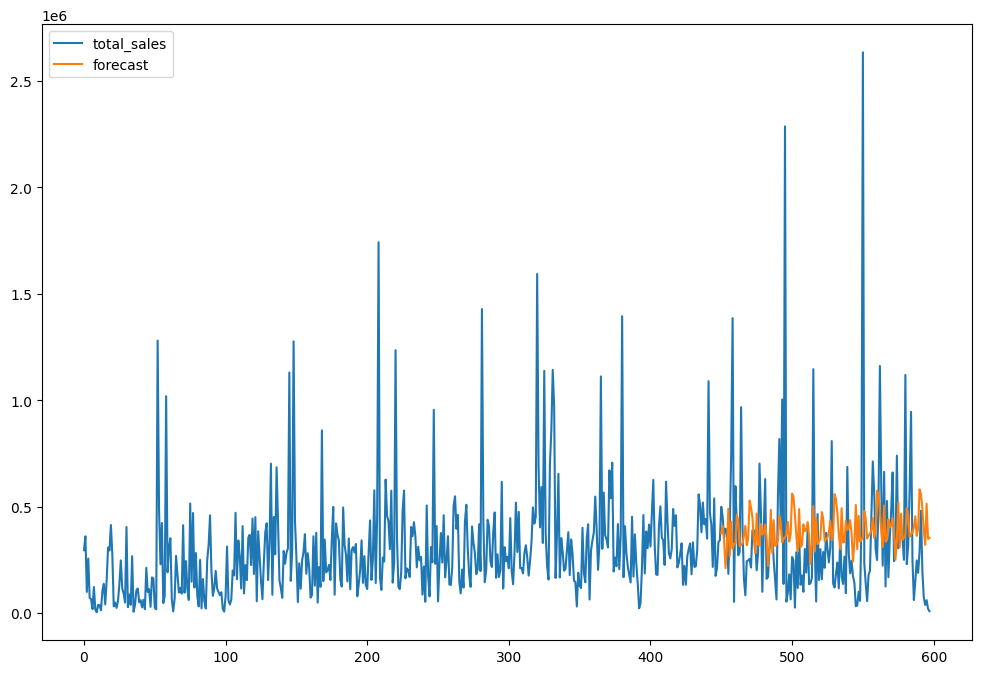

In [53]:
daily_sales['forecast']=results.predict(start=450,end=600,dynamic=True)
daily_sales[['total_sales','forecast']].plot(figsize=(12,8))

Based on the analysis of the various models, the **SARIMAX(1, 1, 2)** model is the best choice for forecasting `total_sales`. This model provides significant coefficients, meaning it effectively captures the important patterns in the data, and it has the lowest AIC score, indicating the best overall fit.

Here’s how it compares to the other models:

- **ARIMA(1, 1 , 1)**: While this model had a significant MA term, the AR term was not significant, suggesting it didn't fully capture the dynamics of the data. It also showed issues with non-normal residuals and heteroskedasticity, which limited its reliability.

- **SARIMAX(1, 1, 2)x(1, 1, 2, 30)**: This model offered a better fit with a lower AIC and BIC, but none of its coefficients were significant, which implies it might be overfitting or not capturing the important factors influencing `total_sales`.

- **SARIMAX(2, 1, 0)x(2, 1, 0, 12)**: This model had significant coefficients and provided a better understanding of seasonal patterns. However, it showed some autocorrelation and issues with non-normality and heteroskedasticity in the residuals.

The **SARIMAX(1, 1, 2)** model stands out because it balances significant coefficients with a good overall fit and no significant autocorrelation. Despite these strengths, it still faces challenges with non-normal residuals and heteroskedasticity. To further enhance this model, consider data transformations to stabilize variance and improve residuals' normality. Exploring additional external factors that might affect sales could also refine its accuracy. Overall, this model is the most promising among those tested, but fine-tuning is necessary for even better performance.                                                                                                         

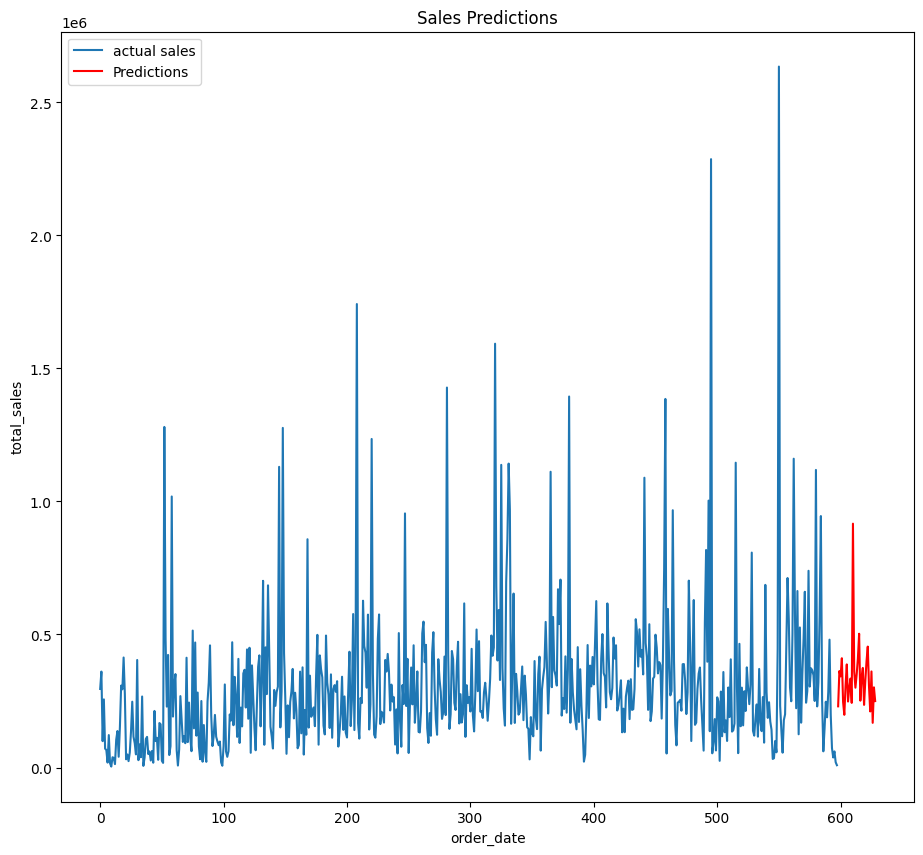

In [55]:
predictions = results.predict(start=len(daily_sales['total_sales']),end=len(daily_sales['total_sales'])+30)

# plot predictions
plt.figure(figsize=(11, 10))
plt.plot(daily_sales['total_sales'], label='actual sales')
plt.plot(predictions, color='red', label='Predictions')
plt.xlabel('order_date')
plt.ylabel('total_sales')
plt.title('Sales Predictions')
plt.legend(loc='upper left')
plt.show()


Based on the analysis of the various models, the **SARIMAX(1, 1, 2)** model is the best choice for forecasting `total_sales`. This model provides significant coefficients, meaning it effectively captures the important patterns in the data. It also performs well overall, with the lowest AIC score, indicating a good fit to the data.

However, there are still some issues to address: the residuals (the differences between the model's predictions and the actual data) are not normally distributed, and there's evidence of heteroskedasticity (unequal variability). These problems suggest that while the model is currently the best among those tested, it could be improved. 

To enhance the model, consider transforming the data to stabilize variance and make the residuals more normally distributed. You might also explore adding other factors that could influence sales. These steps will help make the model more accurate and reliable for future forecasts.

Here are the diagnostics outputs for each of the models analyzed:

### 1. **ARIMA(1, 1, 1) Model**

- **Ljung-Box Test (L1) (Q)**:
  - Statistic: 0.02
  - p-Value: 0.89
  - Interpretation: No significant autocorrelation in the residuals.

- **Jarque-Bera Test (JB)**:
  - Statistic: 9147.80
  - p-Value: 0.00
  - Interpretation: Residuals are not normally distributed.

- **Heteroskedasticity (H)**:
  - Statistic: 2.55
  - p-Value: 0.00
  - Interpretation: Significant heteroskedasticity (unequal variance) in the residuals.

- **Skew**: 3.28
  - Interpretation: Positive skewness indicates asymmetry in the residual distribution.

- **Kurtosis**: 21.02
  - Interpretation: High kurtosis suggests heavy tails and potential outliers in the residuals.

### 2. **SARIMAX(1, 1, 2)x(1, 1, 2, 30) Model**

- **Ljung-Box Test (L1) (Q)**:
  - Statistic: 0.03
  - p-Value: 0.86
  - Interpretation: No significant autocorrelation in the residuals.

- **Jarque-Bera Test (JB)**:
  - Statistic: 5876.14
  - p-Value: 0.00
  - Interpretation: Residuals are not normally distributed.

- **Heteroskedasticity (H)**:
  - Statistic: 2.36
  - p-Value: 0.00
  - Interpretation: Significant heteroskedasticity in the residuals.

- **Skew**: 2.76
  - Interpretation: Positive skewness indicates asymmetry in the residual distribution.

- **Kurtosis**: 17.77
  - Interpretation: High kurtosis suggests heavy tails and potential outliers in the residuals.

### 3. **SARIMAX(2, 1, 0)x(2, 1, 0, 12) Model**

- **Ljung-Box Test (L1) (Q)**:
  - Statistic: 4.31
  - p-Value: 0.04
  - Interpretation: Some residual autocorrelation detected.

- **Jarque-Bera Test (JB)**:
  - Statistic: 1873.69
  - p-Value: 0.00
  - Interpretation: Residuals are not normally distributed.

- **Heteroskedasticity (H)**:
  - Statistic: 3.07
  - p-Value: 0.00
  - Interpretation: Significant heteroskedasticity in the residuals.

- **Skew**: 1.08
  - Interpretation: Moderate positive skewness in the residuals.

- **Kurtosis**: 11.49
  - Interpretation: Elevated kurtosis indicating heavy tails and potential outliers.

### 4. **SARIMAX(1, 1, 2) Model**

- **Ljung-Box Test (L1) (Q)**:
  - Statistic: 0.07
  - p-Value: 0.79
  - Interpretation: No significant autocorrelation in the residuals.

- **Jarque-Bera Test (JB)**:
  - Statistic: 9378.79
  - p-Value: 0.00
  - Interpretation: Residuals are not normally distributed.

- **Heteroskedasticity (H)**:
  - Statistic: 2.58
  - p-Value: 0.00
  - Interpretation: Significant heteroskedasticity in the residuals.

- **Skew**: 3.29
  - Interpretation: Positive skewness indicating asymmetry in the residual distribution.

- **Kurtosis**: 21.27
  - Interpretation: High kurtosis suggesting heavy tails and potential outliers in the residuals.

These diagnostic tests help evaluate the validity and reliability of the models by checking for autocorrelation, normality, and variance stability in the residuals.